In [1]:
!pip install torch torchvision
!pip install opencv-python
!pip install segment-anything
!pip install matplotlib

!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth

--2025-11-21 12:29:10--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.108, 3.163.189.96, 3.163.189.14, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375042383 (358M) [binary/octet-stream]
Saving to: ‘sam_vit_b_01ec64.pth’

sam_vit_b_01ec64.pt 100%[===================>] 357.67M   393MB/s    in 0.9s    

2025-11-21 12:29:11 (393 MB/s) - ‘sam_vit_b_01ec64.pth’ saved [375042383/375042383]



In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamPredictor

import os
import time

In [3]:
sam = sam_model_registry["vit_b"](checkpoint="sam_vit_b_01ec64.pth")
sam.cuda()  # sam.cpu() либо sam.cuda()
predictor = SamPredictor(sam)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
base_path = "/content/drive/MyDrive/models/data"
images_path = os.path.join(base_path, "images")
labels_path = os.path.join(base_path, "labels")

In [6]:
def make_masks_for_images(images_path, labels_path, targeted_classes):
  objects = []

  for img_name in os.listdir(images_path):
    start = alltime = time.perf_counter()
    name_without_ext = os.path.splitext(img_name)[0]
    label_path = os.path.join(labels_path, f'{name_without_ext}.txt')

    if not os.path.isfile(label_path):
      print(f"Пропускаем {img_name}: файл меток не найден")
      continue
    print(name_without_ext)

    image_path = os.path.join(images_path, img_name)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    H, W = image.shape[:2]

    print(f"Изображение получено : {time.perf_counter() - start:.4f} секунд")
    start = time.perf_counter()

    predictor.set_image(image)

    print(f"Изображение добавлено в модель : {time.perf_counter() - start:.4f} секунд")
    start = time.perf_counter()

    objects.append(image)
    with open(label_path, "r", encoding="utf-8") as f:
      lines = [line.strip() for line in f]


    for line in lines:
      print(f"{line.split()[0]} in {targeted_classes} : {line.split()[0] in targeted_classes}")
      if line.split()[0] not in targeted_classes:
        continue
      parts = list(map(float, line.split()))
      x_center, y_center, w, h = parts[1], parts[2], parts[3], parts[4]

      x_min = int((x_center - w / 2) * W)
      y_min = int((y_center - h / 2) * H)
      x_max = int((x_center + w / 2) * W)
      y_max = int((y_center + h / 2) * H)

      bbox = np.array([x_min, y_min, x_max, y_max])

      masks, _, _ = predictor.predict(box=bbox, multimask_output=False)

      mask = masks[0]
      object_only = np.zeros_like(image)
      object_only[mask] = image[mask]

      objects.append(object_only)

    print(f"Все аннотации сохранены : {time.perf_counter() - start:.4f} секунд")
    print(f"Код выполнен : {time.perf_counter() - alltime:.4f} секунд")
    start = time.perf_counter()

    plt.figure(figsize=(10, 5))

    l = len(objects)//3+1
    for i, obj in enumerate(objects, start=1):
      plt.subplot(l, 3, i)
      plt.imshow(obj)
      plt.axis("off")

    plt.show()
    plt.clf()
    print(f"Отрисовка : {time.perf_counter() - start:.4f} секунд")
    objects = []


150696-2-v_JPG.rf.27e0ef2c551e8f96bbaefbd21ad57fdb
Изображение получено : 0.8454 секунд
Изображение добавлено в модель : 1.8703 секунд
1 in ['5', '6'] : False
0 in ['5', '6'] : False
6 in ['5', '6'] : True
Все аннотации сохранены : 0.6641 секунд
Код выполнен : 3.3800 секунд


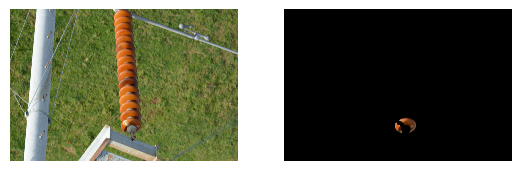

Отрисовка : 1.4350 секунд
100010_JPG.rf.ff3d1ff9579a8b9879fba98ff5148e37
Изображение получено : 1.3505 секунд
Изображение добавлено в модель : 0.4714 секунд
1 in ['5', '6'] : False
6 in ['5', '6'] : True
1 in ['5', '6'] : False
Все аннотации сохранены : 0.2534 секунд
Код выполнен : 2.0755 секунд


<Figure size 640x480 with 0 Axes>

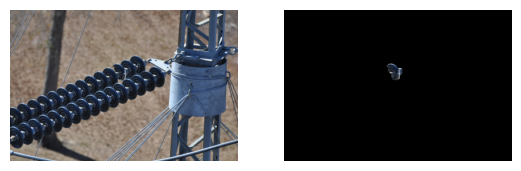

Отрисовка : 0.7666 секунд
150362_JPG.rf.bb39ca2662582726d9fa472a0f3799f1
Изображение получено : 0.7134 секунд
Изображение добавлено в модель : 0.6767 секунд
6 in ['5', '6'] : True
1 in ['5', '6'] : False
Все аннотации сохранены : 0.4628 секунд
Код выполнен : 1.8532 секунд


<Figure size 640x480 with 0 Axes>

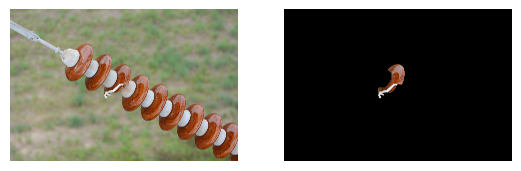

Отрисовка : 1.4086 секунд
15072_jpg.rf.5cbc9314e10e880f2858345ac1d3d9b0
Изображение получено : 0.7075 секунд
Изображение добавлено в модель : 0.4892 секунд
6 in ['5', '6'] : True
1 in ['5', '6'] : False
6 in ['5', '6'] : True
Все аннотации сохранены : 1.6786 секунд
Код выполнен : 2.8756 секунд


<Figure size 640x480 with 0 Axes>

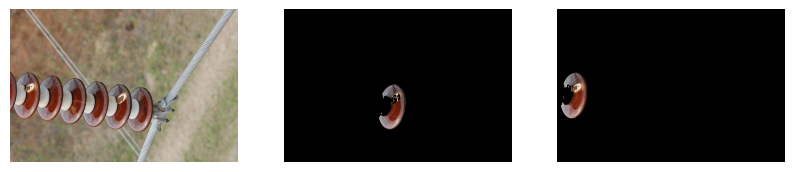

Отрисовка : 1.9273 секунд
150599-2-_JPG.rf.f1af1d1712b3e16e38eefb0611ad6553
Изображение получено : 1.5679 секунд
Изображение добавлено в модель : 0.5552 секунд
1 in ['5', '6'] : False
6 in ['5', '6'] : True
6 in ['5', '6'] : True
1 in ['5', '6'] : False
Все аннотации сохранены : 0.5216 секунд
Код выполнен : 2.6448 секунд


<Figure size 640x480 with 0 Axes>

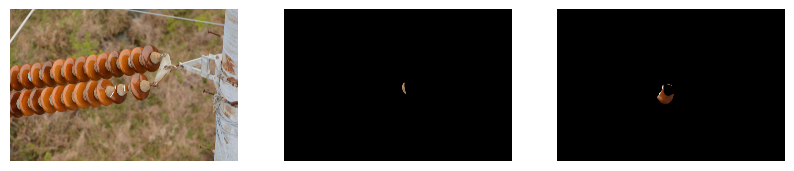

Отрисовка : 2.1007 секунд
130012_JPG.rf.c07fbd64f1a86012b7a69ade58ff3649
Изображение получено : 0.2603 секунд
Изображение добавлено в модель : 0.4637 секунд
6 in ['5', '6'] : True
1 in ['5', '6'] : False
Все аннотации сохранены : 0.4406 секунд
Код выполнен : 1.1648 секунд


<Figure size 640x480 with 0 Axes>

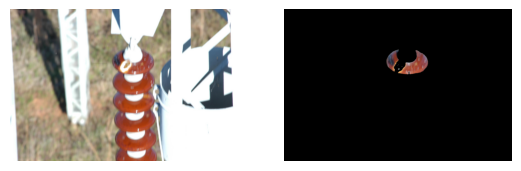

Отрисовка : 0.6106 секунд
160190_JPG.rf.b09e8160b6980d7de691d8abf8551cb4
Изображение получено : 0.7653 секунд
Изображение добавлено в модель : 0.4841 секунд
1 in ['5', '6'] : False
6 in ['5', '6'] : True
6 in ['5', '6'] : True
0 in ['5', '6'] : False
Все аннотации сохранены : 0.5136 секунд
Код выполнен : 1.7632 секунд


<Figure size 640x480 with 0 Axes>

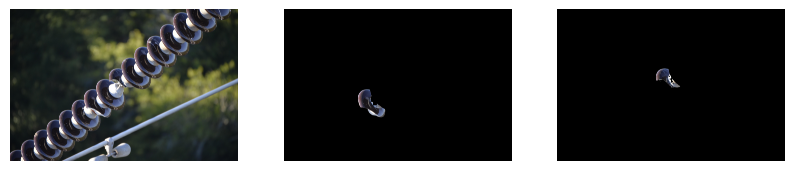

Отрисовка : 1.4899 секунд
000000986_jpeg.rf.4a0108399c0bb5bc19471755ba4e4148
Изображение получено : 0.3556 секунд
Изображение добавлено в модель : 0.4370 секунд
6 in ['5', '6'] : True
1 in ['5', '6'] : False
Все аннотации сохранены : 0.4076 секунд
Код выполнен : 1.2006 секунд


<Figure size 640x480 with 0 Axes>

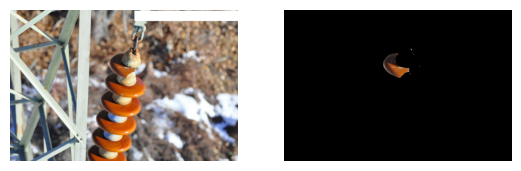

Отрисовка : 0.5736 секунд
100228_JPG.rf.78d3b82a9a86e3c08abfdb5691b6193e
Изображение получено : 0.3759 секунд
Изображение добавлено в модель : 0.4205 секунд
6 in ['5', '6'] : True
1 in ['5', '6'] : False
Все аннотации сохранены : 0.5441 секунд
Код выполнен : 1.3408 секунд


<Figure size 640x480 with 0 Axes>

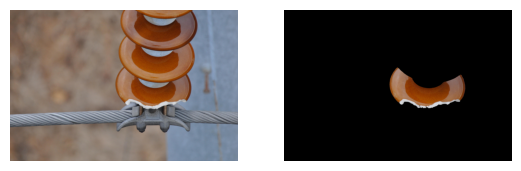

Отрисовка : 0.6977 секунд
150452_JPG.rf.63afbb9520f8bd08796113311ae1ebb5
Изображение получено : 0.6983 секунд
Изображение добавлено в модель : 0.5551 секунд
0 in ['5', '6'] : False
1 in ['5', '6'] : False
1 in ['5', '6'] : False
6 in ['5', '6'] : True
Все аннотации сохранены : 0.4447 секунд
Код выполнен : 1.6983 секунд


<Figure size 640x480 with 0 Axes>

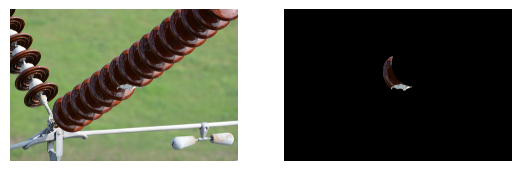

Отрисовка : 1.4067 секунд


<Figure size 640x480 with 0 Axes>

In [7]:
make_masks_for_images(images_path, labels_path, ['5', '6'])